<a id = 'top'></a>
#### THIS NOTEBOOK CONSISTS OF CLUSTERING PROBLEM ADDRESSED BY FOLLOWING ALGORITHMS
  - [ANALYSING DATASET](#dataset)
  - [K-means clustering implemented using pytho](#python)
  - [K-means clustering implemented using sklearn](#sklearn)
  - [CONCLUSION'S](#conclusion)
  
  ------------------------------------------------------------- [BACK TO TOP](#top)

In [2]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math      # not needed just in case
import random    # not needed just in case

<a id = 'dataset'></a>
### ANLYSING THE DATASET
- in this project we will be generating random unlabeled data and using it
- let us create 2000 2d points and visualise them and then cluster them into 4 groups
- and accept a new point and predict to which cluster does this point belong to
---------------------------------------------------------------------[BACK TO TOP](#top)

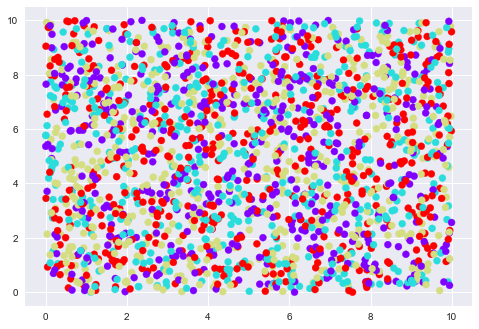

In [3]:
# generating random data and visualising it
m = 2000     # no of datapoints
n = 2        # features in each datapoint 2 can be visulaised
plt.style.use('seaborn')
arr= np.random.rand(m,n)*10
clus = np.random.randint(0,4,2000) # randomly assigning points to clusters
plt.scatter(x = arr[:,0],y = arr[:,1] ,c=clus ,cmap = 'rainbow' )

In [5]:
def cluster_the_points(arr,centroids,k,m,n):
    nc = np.zeros(m)   # to store centroids index of each example
    for i in range(m):
        dist = np.zeros(k)  # to store dist of each point wrt every centroid
        for j in range(k):
            dist[j]=np.sqrt(np.sum((arr[i]-centroids[j,:])**2))
        nc[i] = np.argmin(dist)
    return nc

def calculate_centroids(arr,nc,k,m,n):
    """function to calculate centroids"""
    new_centroids = np.zeros((k,n))
    for i in range(k):
        f = nc==i # filter out indexes of points which belong to ith class
        new_centroids[i,:] = np.mean(arr[f,:],axis=0,keepdims=True)
    return new_centroids
def kmeans2(k,arr):
    """function to cluster the datapoints in to k clusters and return the cluster to which
    each data point belongs as an array
    input dimensions arr = m x n
    output dimensions    = m x 1 
    m no of input datapoints
    n no of features in each data point"""
    k                # no of clusters
    m = arr.shape[0] # no of examples
    n = arr.shape[1] # no of features
    centroids = random.sample(range(m),k)
    centroids = arr[centroids,:]   # randomly selecting k points and making them as centroids
    while True:
        nc = cluster_the_points(arr,centroids,k,m,n)
        newcentroids = calculate_centroids(arr,nc,k,m,n)
        if np.array_equiv(newcentroids,centroids) :return [ nc, centroids]  
        else: centroids = newcentroids
cluster2,final_centroids= kmeans2(4,arr.copy()) # 
# we operated by 0 indexing cluster's therefre in the end add 1 to get 1 indexing clusters

Text(0.5, 1.0, 'using python')

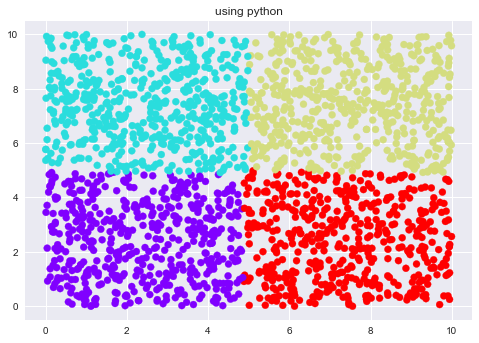

In [6]:
plt.scatter(arr[:,0],arr[:,1],c = cluster2,cmap='rainbow')
plt.title('using python')

Text(0.5, 1.0, 'using sk learn')

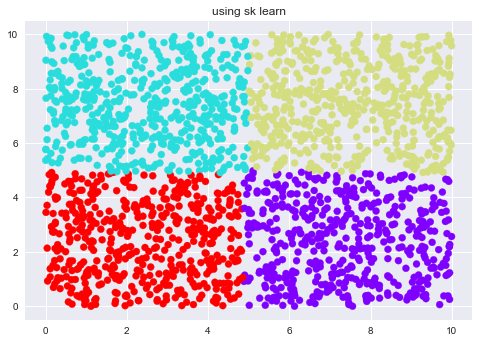

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)  # defining no of clusters as 4
kmeans.fit(arr.copy())
cluster1 = kmeans.labels_       # extracting the cluster to which every point has been assigned to
plt.scatter(arr[:,0],arr[:,1],c = cluster1,cmap='rainbow') # plotting every point
plt.title('using sk learn')

<a id = 'conclusion'></a>
### CONCLUSION'S
- we can make out from the scatter plot that both the models work alike
- but we cannot really compare them as the cluster numbering in both the models is quite
  different , so we have to make do with the plots and understand that there is absolutely
  no difference between both the models

Text(0.5, 1.0, 'using sk learn')

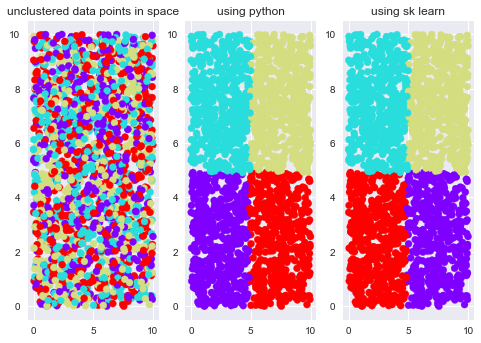

In [9]:
# plotting all of them together
plt.subplot(1,3,1)
plt.scatter(x = arr[:,0],y = arr[:,1] ,c=clus ,cmap = 'rainbow' )
plt.title('unclustered data points in space')
plt.subplot(1,3,2)
plt.scatter(arr[:,0],arr[:,1],c = cluster2,cmap='rainbow')
plt.title('using python')
plt.subplot(1,3,3)
plt.scatter(arr[:,0],arr[:,1],c = cluster1,cmap='rainbow')
plt.title('using sk learn')